In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torch 
x = torch.Tensor(3,4)       #直接生成3行4列的FloatTensor
y = torch.tensor([3,4])     #根据数据类型生成Tensor因此需要具体数据
# y = torch.Tensor(3,4)      #是不行的
print(x)
print(y)
print(x.type())
print(y.type())

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([3, 4])
torch.FloatTensor
torch.LongTensor


predict (after training) 4 7.999998569488525


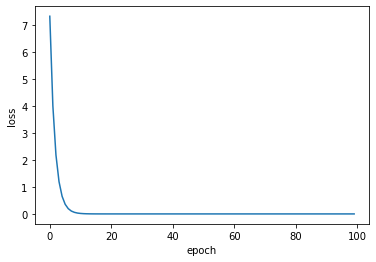

In [3]:
import torch
import matplotlib.pyplot as plt


x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
alpha = 0.01
w = torch.Tensor([1.0])
w.requires_grad = True  # 需要计算梯度


def forward(x_val):
    return x_val * w


def loss(x_val, y_val):
    y_hat = forward(x_val)
    return (y_hat - y_val) ** 2


epoch_list = []
cost_list = []
for epoch in range(100):
    # 随机梯度下降
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        # print('\t grad:', x, y, w.grad.item())
        w.data = w.data - alpha * w.grad.data
        w.grad.data.zero_()
    epoch_list.append(epoch)
    cost_list.append(l.item())
    # print('progress:', epoch, l.item())  # 取出loss使用l.item，不要直接使用l（l是tensor会构建计算图）
print("predict (after training)", 4, forward(4).item())
plt.plot(epoch_list, cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


progress: 0 18.321826934814453
progress: 1 2.858394145965576
progress: 2 1.1675907373428345
progress: 3 0.04653334245085716
progress: 4 0.14506366848945618
progress: 5 0.009403289295732975
progress: 6 0.04972923547029495
progress: 7 0.025129113346338272
progress: 8 0.03345605731010437
progress: 9 0.027609655633568764
progress: 10 0.02848036028444767
progress: 11 0.02642466314136982
progress: 12 0.025804826989769936
progress: 13 0.02462013065814972
progress: 14 0.023777369409799576
progress: 15 0.0228563379496336
progress: 16 0.022044027224183083
progress: 17 0.02125072106719017
progress: 18 0.020513182505965233
progress: 19 0.019810274243354797
progress: 20 0.019148115068674088
progress: 21 0.018520694226026535
progress: 22 0.017927465960383415
progress: 23 0.01736525259912014
progress: 24 0.016833148896694183
progress: 25 0.01632905937731266
progress: 26 0.01585075818002224
progress: 27 0.015397666022181511
progress: 28 0.014967591501772404
progress: 29 0.014559715054929256
progress: 

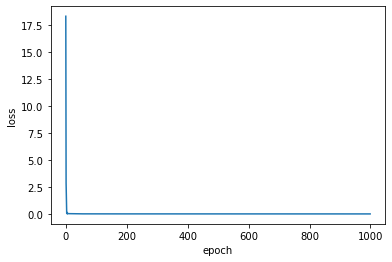

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch 
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
alpha = 0.01
w1 = torch.Tensor([1.0])
w1.requires_grad = True  # 需要计算梯度
w2 = torch.Tensor([1.0])
w2.requires_grad = True 
b = torch.Tensor([1.0])
b.requires_grad = True 

def forward(x_val):
    return (x_val**2)*w1 + x_val*w2 + b 


def loss(x_val, y_val):
    y_hat = forward(x_val)
    return (y_hat - y_val) ** 2


epoch_list = []
cost_list = []
for epoch in range(1000):
    # 随机梯度下降
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        # print('\t grad:', x, y, w.grad.item())
        w1.data = w1.data - alpha * w1.grad.data
        w2.data = w2.data - alpha * w2.grad.data
        b.data = b.data - alpha * b.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()
    epoch_list.append(epoch)
    cost_list.append(l.item())
    print('progress:', epoch, l.item())  # 取出loss使用l.item，不要直接使用l（l是tensor会构建计算图）
print("predict (after training)", 4, forward(4).item())
plt.plot(epoch_list, cost_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
